In [1]:
import particle_in_a_box as pib
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

lightColor = "#8bb1cc"
darkColor = "#0f4c75"

plt.rcParams["text.usetex"] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Dejavu Serif'
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['animation.writer'] = 'ffmpeg'
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg\\bin\\ffmpeg.exe'

In [9]:
gamma = 1000000
L = np.pi
m = 1

myState = pib.Particle_in_Box_State(gamma, L, m, [1,2,3,4], [1,1,1,1])
myState.add_state([100, 101], [1,1])
myState.remove_state([1,2,3,4])
myState.gamma = 0.00001

print("Normalized Coeffs: ", np.abs(myState._esp._energy_proj_coeffs))
print("start exp val: ", myState._xsp._expectation_value(0))

adding state(s):  [1, 2, 3, 4]
< 1 | x | 2 > = (0.5658846023576151+0j)
< 3 | x | 2 > = (-0.6111553705462235+0j)
< 1 | x | 4 > = (-0.045270768188610415+0j)
< 3 | x | 4 > = 0.6236279291287992
current config:  [1, 2, 3, 4]
energy expectation value:  3.7499952253562663
adding state(s):  [100, 101]
< 1 | x | 2 > = (0.5658846023576151+0j)
< 3 | x | 2 > = (-0.6111553705462235+0j)
< 1 | x | 4 > = (-0.045270768188610415+0j)
< 3 | x | 4 > = 0.6236279291287992
< 1 | x | 100 > = (-2.5469900828619447e-06+0j)
< 3 | x | 100 > = 7.653211713497383e-06
< 101 | x | 2 > = (4.947057083247497e-06+0j)
< 101 | x | 4 > = -9.91744245502812e-06
< 101 | x | 100 > = -0.6366044201171646
current config:  [1, 2, 3, 4, 100, 101]
energy expectation value:  1685.9145200929543
removing state(s):  [1, 2, 3, 4]
< 101 | x | 100 > = -0.6366044201171646
current config:  [100, 101]
energy expectation value:  5050.243569828148
Recomputing every property that depends on L or gamma...
< 101 | x | 100 > = -0.6366358486278333
Norma

auto setting time to:  1.2629518205385986


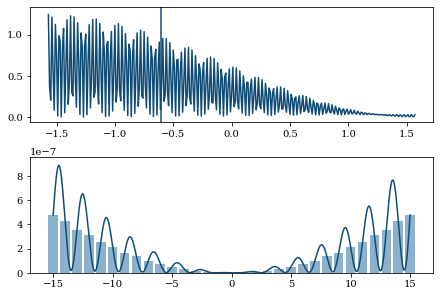

In [15]:
x = np.arange(-L/2, L/2, 0.01)
kb = 15
k = np.arange(-kb, kb+0.01, 0.01)
kn = np.arange(-kb, kb+1, 1)

x_space_wavefunc = myState.x_space_wavefunction
x_exp_val = myState._xsp._expectation_value
k_space_wavefunc = myState.k_space_wavefunction
new_k_space_wavefunc = myState.new_k_space_wavefunction

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[1,1])
kDistrPlot = fig.add_subplot(gs[1,0])
xDistrPlot = fig.add_subplot(gs[0, 0])

k_lines = kDistrPlot.plot(k, np.abs(k_space_wavefunc(k, 0)**2), animated=True, color = darkColor)
x_lines = xDistrPlot.plot(x, np.abs(x_space_wavefunc(x, 0)**2), animated=True, color = darkColor)
k_bars = kDistrPlot.bar(kn, np.abs(new_k_space_wavefunc(kn, 0))**2, animated=True, color = lightColor)
x_exp_line = xDistrPlot.axvline(x_exp_val(0), animated=True, color = darkColor)

fps = 20
time = 2
speed = 0.05
if myState._sp._num_energy_states == 2:
    time = 2*np.pi/abs(myState._esp._energies[0]-myState._esp._energies[1])/speed
    print("auto setting time to: ", time)

time_per_frame = 1/fps*speed
num_frames = time*fps

def init():
    return x_lines + k_lines + [x_exp_line] + list(k_bars)

def animate(i):
    x_lines[0].set_data(x, np.abs(x_space_wavefunc(x, time_per_frame*i))**2)
    k_lines[0].set_data(k, np.abs(k_space_wavefunc(k, time_per_frame*i))**2)
    x_ev = x_exp_val(time_per_frame*i)
    x_exp_line.set_data([x_ev, x_ev],[0,1])

    for bar, h in zip(k_bars, np.abs(new_k_space_wavefunc(kn, i*time_per_frame))**2):
        bar.set_height(h)
    return x_lines + k_lines + [x_exp_line] + list(k_bars)

anim = FuncAnimation(fig, animate, init_func=init, frames=int(num_frames), interval=int(1/fps*1000), blit=True)
anim


In [ ]:
class Some_properties:
    def __init__(self, p1, p2):
        self._p1 = p1
        self._p2 = p2
    
    def __str__(self):
        return "p1: " + str(self._p1) + ", p2: " + str(self._p2)

class Composition:
    def __init__(self, props: Some_properties):
        self._props = props
    
    def print_props(self):
        print(self._props)

class Master:
    def __init__(self, p1, p2):
        self._master_props = Some_properties(p1, p2)
        self._has_a = Composition(self._master_props)

    def manip_props(self, v1, v2):
        self._master_props._p1 = v1
        self._master_props._p2 = v2



master = Master(1, 2)
master._has_a.print_props()
master.manip_props(3, 4)
master._has_a.print_props()
    